In [182]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score

In [98]:
df_movies = pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',header=None)

In [99]:
df_movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [137]:
df_movies.shape

(3883, 3)

In [100]:
df_users = pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age','Occupation','zip-code'],engine='python',header=None)

In [101]:
df_users.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [138]:
df_users.shape

(6040, 5)

In [102]:
df_ratings = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating', 'Timestamp'],parse_dates=['Timestamp'],engine='python',header=None
)

In [103]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


<b>Merge and create the new dataset Master_data</b>

In [104]:
df_movie_ratings = pd.merge(df_movies, df_ratings, on='MovieID')
df_movie_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [105]:
Master_Data =pd.merge(df_movie_ratings, df_users, on ='UserID')
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [34]:
Master_Data = df_movie_ratings_users.drop(['zip-code', 'Timestamp'],axis=1)
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Rating      1000209 non-null  int64 
 5   Gender      1000209 non-null  object
 6   Age         1000209 non-null  int64 
 7   Occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [106]:
Master_Data.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [136]:
Master_Data.shape

(1000209, 11)

<b>Visualization of Data</b>

In [221]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59']
Master_Data['age_group'] = pd.cut(Master_Data.Age, range(0, 61, 10), right=False, labels=labels)
Master_Data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,1,0-9
53,50,50-59
124,25,20-29
369,35,30-39
770,18,10-19
2778,45,40-49
5001,56,50-59


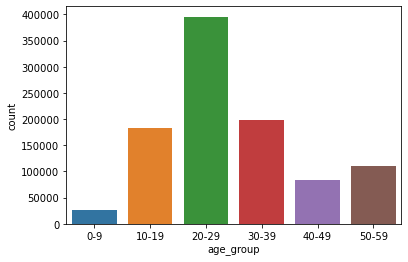

In [222]:
#the number of users in different age distribution.
age_plot = sns.countplot(x="age_group", data=Master_Data)

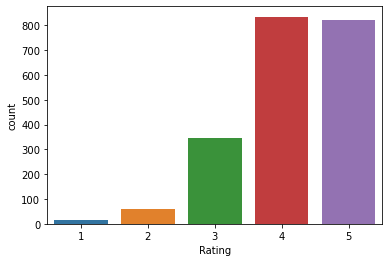

In [108]:
#Users rating of the Toy story
movies_grouped = df_movie_ratings.groupby('Title')
toy_story = movies_grouped.get_group('Toy Story (1995)')
sns.countplot(x="Rating", data=toy_story)

<b> Top 25 movies with the highest average rating<b>

In [110]:
#average ratings of the movies
rating_avg = df_movie_ratings.groupby('Title')['Rating'].mean().sort_values(ascending=False)
rating_avg.head(25)

Title
Gate of Heavenly Peace, The (1995)                                     5.000000
Lured (1947)                                                           5.000000
Ulysses (Ulisse) (1954)                                                5.000000
Smashing Time (1967)                                                   5.000000
Follow the Bitch (1998)                                                5.000000
Song of Freedom (1936)                                                 5.000000
Bittersweet Motel (2000)                                               5.000000
Baby, The (1973)                                                       5.000000
One Little Indian (1973)                                               5.000000
Schlafes Bruder (Brother of Sleep) (1995)                              5.000000
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                                    4.800000
Lamerica (1994)                                                        4.750000
Apple, The (Sib) (1998)           

In [111]:
#Count of the number of rating for different movies
rating_count = df_movie_ratings.groupby('Title')['Rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [155]:
# Movies with the highest Viewership excluding the number less than 200
rating_avg_count = pd.DataFrame(data = rating_avg)
rating_avg_count['number_of_ratings'] = pd.DataFrame(rating_count)
rating_avg_count[rating_avg_count['number_of_ratings']> 2000][:25]

,Rating,number_of_ratings
Title,,
"Shawshank Redemption, The (1994)",4.554558,2227
"Godfather, The (1972)",4.524966,2223
Schindler's List (1993),4.510417,2304
Raiders of the Lost Ark (1981),4.477725,2514
Star Wars: Episode IV - A New Hope (1977),4.453694,2991
"Sixth Sense, The (1999)",4.406263,2459
"Silence of the Lambs, The (1991)",4.351823,2578
Saving Private Ryan (1998),4.337354,2653
American Beauty (1999),4.317386,3428


In [145]:
#the ratings for all the movies reviewed by for a particular user of user id = 2696
userid_2696 = (Master_Data.groupby('UserID')).get_group(2696)
userid_2696[['UserID','Rating']]

,UserID,Rating
991035,2696,3
991036,2696,5
991037,2696,4
991038,2696,3
991039,2696,4
991040,2696,2
991041,2696,3
991042,2696,4
991043,2696,4
991044,2696,2


In [146]:
#userID_2696 = Master_Data[Master_Data['UserID'] == 2696]

<b> Feature Engineering<b>

In [93]:
#Unique Genres
df_movie_ratings['Genres'].value_counts().head(10)

Comedy                     116883
Drama                      111423
Comedy|Romance              42712
Comedy|Drama                42245
Drama|Romance               29170
Action|Thriller             26759
Horror                      22563
Drama|Thriller              18248
Thriller                    17851
Action|Adventure|Sci-Fi     17783
Name: Genres, dtype: int64

In [96]:
df_movie_ratings['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

<b>Genre category with a one-hot encoding ( 1 and 0)</b>

In [125]:
Master_data_selected = Master_Data[['Gender','Age','Occupation','Rating','Genres']]

In [128]:
Master_data_selected.index

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1000199, 1000200, 1000201, 1000202, 1000203, 1000204, 1000205,
            1000206, 1000207, 1000208],
           dtype='int64', length=1000209)

In [129]:
movie_Genre = Master_data_selected['Genres']
movie_Genre = Genre.str.get_dummies().add_prefix('Genres_')
df_movie_rating_genres = pd.concat([Master_data_selected.drop(['Genres'],axis=1),movie_Genre],axis=1)
df_movie_rating_genres.head()

,Gender,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,...,Genres_Fantasy,Genres_Film-Noir,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western
0,F,1,10,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,1,10,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [131]:
#coding to the gender
df_movie_rating_genres= pd.get_dummies(df_movie_rating_genres,columns=['Gender'])

In [132]:
df_movie_rating_genres

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
0,1,10,5,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,5,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,10,4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,25,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000205,25,4,2,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1000206,25,4,5,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1000207,25,4,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [133]:
df_movie_rating_genres.columns

Index(['Age', 'Occupation', 'Rating', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Children's', 'Genres_Comedy',
       'Genres_Crime', 'Genres_Documentary', 'Genres_Drama', 'Genres_Fantasy',
       'Genres_Film-Noir', 'Genres_Horror', 'Genres_Musical', 'Genres_Mystery',
       'Genres_Romance', 'Genres_Sci-Fi', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Gender_F', 'Gender_M'],
      dtype='object')

<b>Different Models<b>

In [205]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
slr = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)

In [206]:
df_movie_rating_sample = movie_ratings_genres_df.sample(n=100000,random_state=0)
df_movie_rating_sample.head()

,Age,Occupation,Rating,Genres_Action,Genres_Adventure,Genres_Animation,Genres_Children's,Genres_Comedy,Genres_Crime,Genres_Documentary,...,Genres_Horror,Genres_Musical,Genres_Mystery,Genres_Romance,Genres_Sci-Fi,Genres_Thriller,Genres_War,Genres_Western,Gender_F,Gender_M
324271,18,4,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
818637,18,4,3,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
148677,18,14,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
778790,50,7,4,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
525489,25,2,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [207]:
x = df_movie_rating_sample.drop('Rating', axis=1)
y = df_movie_rating_sample['Rating']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [209]:
slr.fit(x_train, y_train)
y_train_pred = slr.predict(x_train)
y_test_pred = slr.predict(x_test)
rsquared_score = r2_score(y_test, y_test_pred)

In [210]:
rsquared_score

0.039210205827538536

In [211]:
length_y_test

12000

In [212]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy
cm

array([[ 108,  120,  386,  398,  109],
       [  91,  216,  738,  781,  266],
       [ 212,  399, 1800, 2113,  656],
       [ 209,  535, 2260, 2898, 1144],
       [ 123,  274, 1309, 1952,  903]])

In [217]:
#df_prediction = pd.DataFrame({'Test': y_test, 'Prediction': y_test_pred})
#df_prediction.head()

In [215]:
#Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
GN = GaussianNB().fit(x_train, y_train) 
GN_predictions = GN.predict(x_test) 
  
# accuracy on X_test 
accuracy = GN.score(x_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, GN_predictions) 

accuracy

0.2905